In [1]:
from logreg import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

### Import Breast Cancer Datasets

In [2]:
# Importing sklearn's breast cancer dataset
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1234)

print(
    f"number of features: {X_train.shape[1]}\n\n"
    
    "Train-test split:\n"
    f"train samples: {X_train.shape[0]}\n"
    f"test samples : {X_test.shape[0]}"
)


number of features: 30

Train-test split:
train samples: 455
test samples : 114


### Initialize Model and Training

In [3]:
# Logistic Regression Model
logReg = LogisticRegression(
            lr=0.1,
            ld=0.00001,
            batch_size=20,
            epochs=220,
            replace_nan=False
        )
logReg.set_verbosity(1)
losses, accuracy = logReg.train(X_train, y_train)

/home/ikhwansh/Documents/InterviewPACMANN/logreg/__init__.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
/home/ikhwansh/Documents/InterviewPACMANN/logreg/__init__.py:66: RuntimeWarning: divide by zero encountered in log
  sums = y_test*np.log(predictions) + (1-y_test)*np.log(1-predictions)
/home/ikhwansh/Documents/InterviewPACMANN/logreg/__init__.py:66: RuntimeWarning: invalid value encountered in multiply
  sums = y_test*np.log(predictions) + (1-y_test)*np.log(1-predictions)


training done, loss: nan, acc: 0.9252747252747253		


### Calculating Accuracy on Training and Test data

In [4]:
# Calculate train and test accuracy
print (f"accuracy on train data -> {logReg.calc_accuracy(X_train, y_train)}")
print (f"accuracy on test data  -> {logReg.calc_accuracy(X_test, y_test)}")

accuracy on train data -> 0.9252747252747253
accuracy on test data  -> 0.9122807017543859


### Accuracy Plot

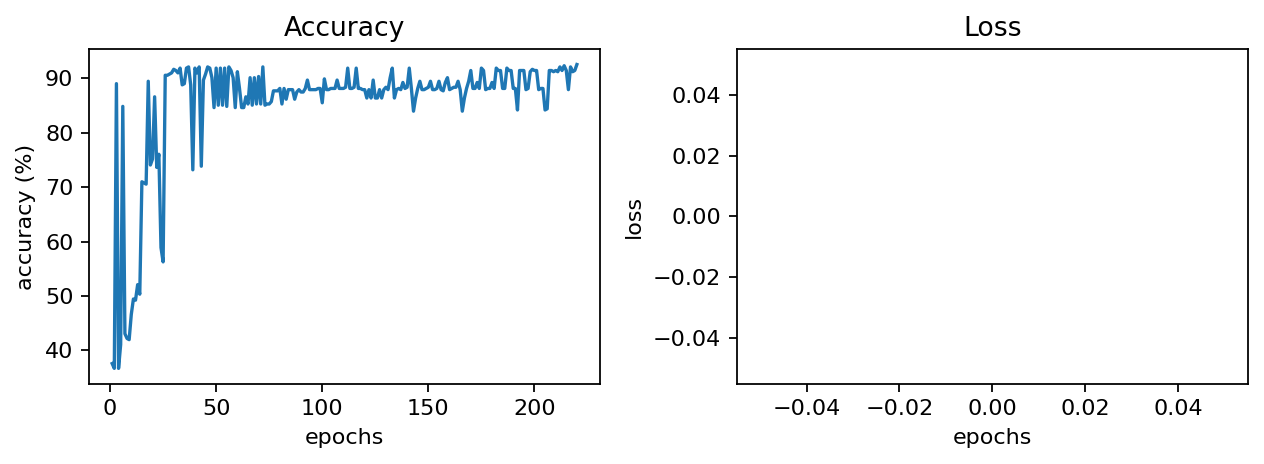

In [5]:
fig = plt.figure(figsize=(8, 3), dpi=160)
axl, axr = fig.subplots(1, 2)
axl.plot([x+1 for x in range(len(accuracy))], [100*acc for acc in accuracy])
axl.set_xlabel('epochs')
axl.set_ylabel('accuracy (%)')
axl.set_title('Accuracy')

axr.plot([x+1 for x in range(len(losses))], [loss for loss in losses])
axr.set_xlabel('epochs')
axr.set_ylabel('loss')
axr.set_title('Loss')

fig.tight_layout()
plt.show()